In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

In [7]:
orders = pd.read_csv('../data/blinkit_orders.csv')
order_items = pd.read_csv('../data/blinkit_order_items.csv')
products = pd.read_csv('../data/blinkit_products.csv')
customers = pd.read_csv('../data/blinkit_customers.csv')

In [7]:
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [9]:
order_items.head()

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


In [11]:
products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [13]:
customers.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [9]:
df = order_items.merge(orders,on='order_id',how='left')
df = df.merge(products,on='product_id',how='left')

In [17]:
df.head()

,order_id,product_id,quantity,unit_price,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,...,store_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,1961864118,642612,3,517.03,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,...,4771,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,365,16,57
1,1549769649,378676,1,881.42,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,...,7534,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,180,19,65
2,9185164487,741341,2,923.84,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,...,9886,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,7,13,62
3,9644738826,561860,1,874.78,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,...,7917,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,180,21,90
4,5427684290,602241,2,976.55,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,...,2741,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75


In [21]:
print(f"\nTotal Orders: {df['order_id'].nunique()}")
print(f"Total Customers: {df['customer_id'].nunique()}")
print(f"Total Products: {df['product_id'].nunique()}")


Total Orders: 5000
Total Customers: 2172
Total Products: 268


In [23]:
top_products = df['product_name'].value_counts().head(10)
print("\nTop 10 Products:")
print(top_products)


Top 10 Products:
product_name
Pet Treats        233
Toilet Cleaner    205
Cough Syrup       190
Lotion            188
Dish Soap         184
Vitamins          183
Baby Wipes        176
Cat Food          152
Pulses            137
Bread             135
Name: count, dtype: int64


In [11]:
orders_per_customer = df.groupby("customer_id")["order_id"].nunique()

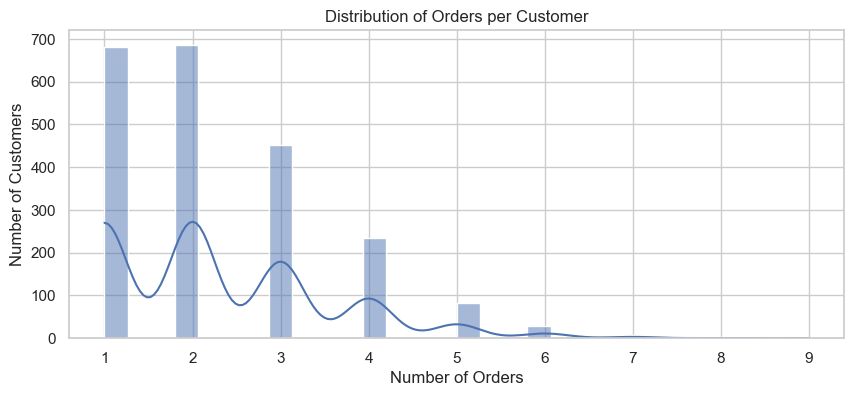

In [15]:
plt.figure(figsize=(10, 4))
sns.histplot(orders_per_customer, bins=30, kde=True)
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

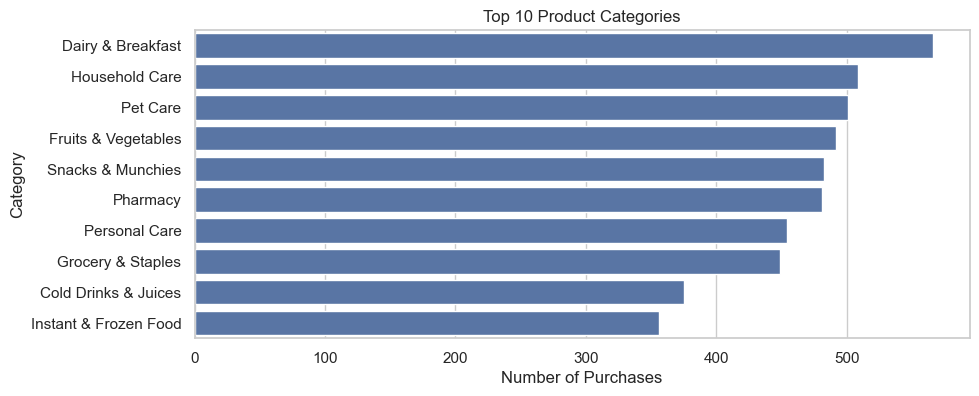

In [17]:
if 'category' in df.columns:
    top_categories = df['category'].value_counts().head(10)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_categories.values, y=top_categories.index)
    plt.title("Top 10 Product Categories")
    plt.xlabel("Number of Purchases")
    plt.ylabel("Category")
    plt.show()

In [31]:
df.to_csv("../data/merged_orders_products.csv", index=False)
print("✅ Merged dataset saved as 'merged_orders_products.csv'")

✅ Merged dataset saved as 'merged_orders_products.csv'
